# Analysis of Accidents Reported on Twitter 
### By **Néstor Suat** in 2021

**Descripción:** Explorando los datos recolectados en twitter sobre reportes de accidentes

### Librerías

In [13]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

### Funciones

In [14]:
def load_data(dirname, filename, init=None, end=None):
    dataset = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
    if init != None and end != None:
        dataset = dataset[(dataset['created_at'] >= init) & (dataset['created_at'] < end)]        
    print("Loaded dataset form: ", dataset.shape)
    return dataset

## Dataset

### Dataset con los accidentes

In [15]:
# Twitter
dir_ = "../../data/database/output_ml/M1/NER_extractor/"
file = 'accident_tweets_lat_lon_geocord_bogota.tsv'
start_date = '2018-10-01'
final_date = '2018-11-01'

# Oficial data
#dir_ = "../../data/database/"
#file = 'historico_accidentes-oct-dic.tsv'


#accidentes = pd.read_csv(dir_+file, delimiter = "\t", quoting = 3)
#accidentes = accidentes[(accidentes['created_at'] >= '2018-10-01') & (accidentes['created_at'] < '2018-11-01')]
accidentes = load_data(dir_, file)
accidentes.head(3)

Loaded dataset form:  (51673, 32)


,_id,api,coordinates,created_at,created_at_str,favorite_count,geo,id_tweet,place_coordinates,place_country,...,user_statuses_count,user_verified,label,clean,entities,location,address_normalization,dataset,lat,lon
0,5bbc2c7eb052c05d41d60e78,Search,{},2018-10-01 05:54:59,2018-10-01 10:54:59,0,{},1046715090085564416,{},NaN,...,41084,False,1,Incidente vial entre un particular y un tracto...,"[('calle 80 con carrera 118', 'loc')]",calle 80 con carrera 118,BOGOTA AVENIDA CALLE 80 CARRERA 118,2_server_token_search,4.664445,-74.053855
1,5bbc2c7eb052c05d41d60e76,Search,{},2018-10-01 06:07:32,2018-10-01 11:07:32,0,{},1046718251307335680,{},NaN,...,53706,False,1,Incidente vial entre un particular y un tracto...,"[('calle 80 con carrera 118', 'loc')]",calle 80 con carrera 118,BOGOTA AVENIDA CALLE 80 CARRERA 118,2_server_token_search,4.664445,-74.053855
2,5bbc2c7eb052c05d41d60e72,Search,{},2018-10-01 06:24:09,2018-10-01 11:24:09,2,{},1046722432814501888,{},NaN,...,41084,False,1,Incidente vial entre dos particulares en la NQ...,"[('NQS con calle 1', 'loc')]",NQS con calle 1,BOGOTA AVENIDA NQS CALLE 1,2_server_token_search,4.613574,-74.092709


In [11]:
accidentes.shape

(51673, 32)

### Geopandas con los datos de referencia de las localidades en Bogotá

In [16]:
#localidades = gpd.read_file('maps/locashp/Loca.shp')
#localidades = gpd.read_file('maps/upla/UPla.shp')
localidades = gpd.read_file('maps/shp2/loca-urb.shp')
#'maps/munishp/Muni.shp'
#'maps/calzadashp/Calzada.shp'
#'maps/upla/UPla.shp'
#localidades = localidades[localidades['LocCodigo'] != '20'] ## Descartando sumapaz
localidades.head(5)

,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry
0,USAQUEN,Acuerdo 8 de 1977 y Res 1751 de 2016,6.520141e+07,01,0.436907,0.005310,"MULTIPOLYGON (((-74.03463 4.82069, -74.03128 4..."
1,CHAPINERO,Acuerdo 8 de 1977 y Res 1751 de 2016,3.800891e+07,02,0.333966,0.003095,"MULTIPOLYGON (((-74.03490 4.67847, -74.03490 4..."
2,SUBA,Acuerdo 8 de 1977,1.005605e+08,11,0.592875,0.008191,"POLYGON ((-74.12738 4.73731, -74.12823 4.73735..."
3,FONTIBON,Acuerdo 8 de 1977,3.328100e+07,09,0.321915,0.002710,"POLYGON ((-74.15857 4.66274, -74.15848 4.66279..."
4,ENGATIVA,Acuerdo 8 de 1977,3.588097e+07,10,0.291966,0.002922,"POLYGON ((-74.15610 4.71807, -74.15616 4.71801..."


In [34]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=44ee399aeeaf69257e0a575abe57ee39a0a56c4478784962e785a04d708352be
  Stored in directory: /home/hat/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText
Note: you may need to restart the kernel to use updated packages.


In [35]:
import adjustText as aT

In [44]:
import matplotlib.pyplot as plt

In [28]:
localidades['center'] = localidades['geometry'].centroid
loc_points = localidades.copy()
loc_points.set_geometry('center',inplace = True)

In [30]:
loc_points.geometry.x

0    -74.035379
1    -74.051255
2    -74.073772
3    -74.140151
4    -74.113188
5    -74.102842
6    -74.071377
7    -74.087912
8    -74.073552
9    -74.194389
10   -74.152658
11   -74.135989
12   -74.150017
13   -74.113322
14   -74.109398
15   -74.085769
16   -74.111580
17   -74.087948
18   -74.072071
dtype: float64

1

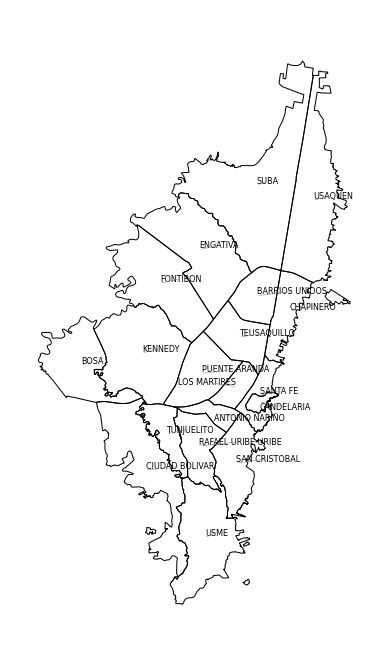

In [40]:
ax = gplt.polyplot(localidades, figsize=(12, 12))
texts = []

for x, y, label in zip(loc_points.geometry.x, loc_points.geometry.y, loc_points["LocNombre"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

<AxesSubplot:>

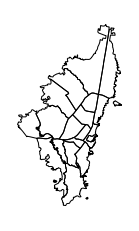

## Creando un Geopandas de accidentes

Primero, para poder graficar los puntos o tenerlos en cuenta con la librería geoplot se requiere construir la geometría.

In [17]:
points = accidentes.apply(
    lambda srs: Point(float(srs['lon']), float(srs['lat'])),
    axis='columns'
)
points

0                POINT (-74.053855 4.664444599999999)
1                POINT (-74.053855 4.664444599999999)
2        POINT (-74.09270913333333 4.613573566666666)
3        POINT (-74.09270913333333 4.613573566666666)
4                        POINT (-74.038825 4.7432423)
                             ...                     
51668            POINT (-74.12195190000001 4.6301741)
51669              POINT (-74.15438979999998 4.68419)
51670                   POINT (-74.1012267 4.5706783)
51671           POINT (-74.1446655 4.674090822222221)
51672            POINT (-74.17915129999999 4.6259823)
Length: 51673, dtype: object

Segundo, se crea un dataframe de geopandas estableciendo la columna geometry con los puntos construidos anteriormente.

In [18]:
gpd_accidentes = gpd.GeoDataFrame(accidentes, geometry=points)
gpd_accidentes.head(2)

,_id,api,coordinates,created_at,created_at_str,favorite_count,geo,id_tweet,place_coordinates,place_country,...,user_verified,label,clean,entities,location,address_normalization,dataset,lat,lon,geometry
0,5bbc2c7eb052c05d41d60e78,Search,{},2018-10-01 05:54:59,2018-10-01 10:54:59,0,{},1046715090085564416,{},NaN,...,False,1,Incidente vial entre un particular y un tracto...,"[('calle 80 con carrera 118', 'loc')]",calle 80 con carrera 118,BOGOTA AVENIDA CALLE 80 CARRERA 118,2_server_token_search,4.664445,-74.053855,POINT (-74.05385 4.66444)
1,5bbc2c7eb052c05d41d60e76,Search,{},2018-10-01 06:07:32,2018-10-01 11:07:32,0,{},1046718251307335680,{},NaN,...,False,1,Incidente vial entre un particular y un tracto...,"[('calle 80 con carrera 118', 'loc')]",calle 80 con carrera 118,BOGOTA AVENIDA CALLE 80 CARRERA 118,2_server_token_search,4.664445,-74.053855,POINT (-74.05385 4.66444)


## Kernel Denisty Estimation

Para realizar la estimación de densidad de kernel se usa la librería geoplot

### Geolocalización de accidentes

In [49]:
ax = gplt.polyplot(localidades,projection=gcrs.PlateCarree(),facecolor='lightgray', figsize=(12, 12))

#texts = []

#for x, y, label in zip(loc_points.geometry.x, loc_points.geometry.y, loc_points["LocNombre"]):
#    texts.append(plt.text(x, y, label, fontsize = 8))

    
gplt.pointplot(gpd_accidentes,edgecolor='lightgray', linewidth=0.5, alpha=0.2,ax=ax)
#ax.set_title('Reporte en Twitter de Accidentes en Bogotá')
#ax.set_xlabel('lon')
#ax.set_ylabel('lat');


#aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

ax.gridlines(draw_labels=True)
ax.set_xlabel('lon')
ax.set_ylabel('lat');
ax.text(-0.09, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',fontsize='x-large',
        transform=ax.transAxes)
ax.text(0.5, -0.07,'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',fontsize='x-large',
        transform=ax.transAxes)
ax.text(0.5, 1.1,'Twitter Report of Traffic Accidents in  Bogotá', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='xx-large',
        transform=ax.transAxes)
ax.text(0.5, 1.06,'Oct 2018 to Jul 2019', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
        transform=ax.transAxes)

for x, y, label in zip(loc_points.geometry.x, loc_points.geometry.y, loc_points["LocNombre"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

fig = ax.get_figure()
fig.savefig("hist-test.png")

ValueError: Image size of 118447x777 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x864 with 1 Axes>

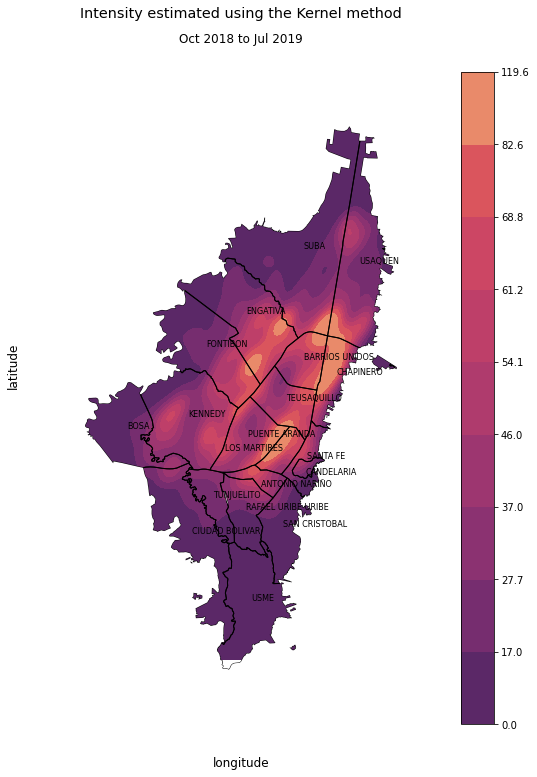

In [52]:
ax = gplt.kdeplot(
    gpd_accidentes, 
    cmap='flare_r', 
    shade=True, 
    shade_lowest=True, 
    clip=localidades, 
    #kernel="epanechnikov",
    #bw_method='scott',
    #bw_adjust=1,
    levels=10,
    cbar=True,
    #projection=gcrs.PlateCarree(),
    figsize=(12, 12)
)

gplt.polyplot(localidades, ax=ax,zorder=1)

#ax.gridlines(draw_labels=True)
ax.text(-0.09, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',fontsize='large',
        transform=ax.transAxes)
ax.text(0.5, -0.07,'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',fontsize='large',
        transform=ax.transAxes)
ax.text(0.5, 1.1,'Intensity estimated using the Kernel method', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='x-large',
        transform=ax.transAxes)
ax.text(0.5, 1.06,'Oct 2018 to Jul 2019', va='top', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontsize='large',
        transform=ax.transAxes)
texts = []
for x, y, label in zip(loc_points.geometry.x, loc_points.geometry.y, loc_points["LocNombre"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1))

fig = ax.get_figure()
fig.savefig("kde-test.png")

In [13]:
ax.factor

AttributeError: 'AxesSubplot' object has no attribute 'factor'

In [25]:
import folium

In [148]:
locations = accidentes[['lat','lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[4.64798885, -74.15665899999998]

In [149]:
from folium import plugins

map = folium.Map(location = [4.645985, -74.097766], tiles='Stamen Terrain', zoom_start = 12)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gpd_accidentes.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map